Preparing data for analysis

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("hotel_bookings.csv")
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [90]:
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [91]:
df.fillna(0, inplace=True)

In [92]:
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


In [93]:
df["meal"].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [94]:
#removing wrong entries
filter = (df["children"]==0)&(df["adults"]==0)&(df["babies"]==0)

In [95]:
df = finaldf = df[~filter]

In [96]:
finaldf

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


Perform Spatial Analysis on Guests HomeTown

In [97]:
#where do guests come from
htdf = finaldf["country"].value_counts().reset_index()
htdf

,index,country
0,PRT,48483
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
...,...,...
173,MRT,1
174,SMR,1
175,DJI,1
176,FJI,1


<AxesSubplot:xlabel='index'>

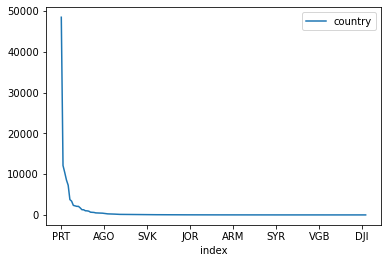

In [98]:
htdf.plot.line(x="index", y="country")

In [99]:
df = df[df["is_canceled"]==0]

In [100]:
resort=df[(df["hotel"]=="Resort Hotel")&(df["is_canceled"]==0)]
city=df[(df["hotel"]=="City Hotel")&(df["is_canceled"]==0)]

In [101]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [102]:
city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [103]:
!pip install plotly

In [104]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [105]:
labels = resort["country"].value_counts().index
values = resort["country"].value_counts().values

In [106]:
trace = go.Pie(labels=labels, values=values, hoverinfo="label+percent", textinfo="value")

In [107]:
iplot([trace])

In [108]:
column_wise_data = df[df["is_canceled"]==0]["country"].value_counts().reset_index()

In [109]:
column_wise_data

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,ATF,1
162,AIA,1
163,NAM,1
164,SMR,1


In [110]:
px.choropleth(column_wise_data, locations=column_wise_data["index"], color=column_wise_data["country"], hover_name=column_wise_data["country"], title="HomeTown of guests")


How much does price of hotel vary every year??

Text(0.5, 1.0, 'Prices of Rooms per person per night')

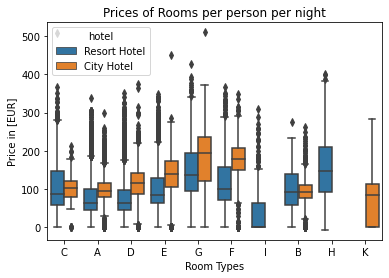

In [111]:
#how much do guests pay for a night
df1 = df[df["is_canceled"]==0]
plt = sns.boxplot(x="assigned_room_type", y="adr", data=df1, hue="hotel")
plt.set_xlabel("Room Types")
plt.set_ylabel("Price in [EUR]")
plt.set_title("Prices of Rooms per person per night")

In [112]:
#how much does the price vary over the year
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [113]:
dfvaryyearresort = resort.groupby(["arrival_date_month", "assigned_room_type"])["adr"].mean().reset_index()
dfvaryyearcity = city.groupby(["arrival_date_month", "assigned_room_type"])["adr"].mean().reset_index()

In [114]:
dfvaryyearresort.head()

,arrival_date_month,assigned_room_type,adr
0,April,A,65.749208
1,April,B,77.046667
2,April,C,78.291534
3,April,D,71.888743
4,April,E,88.267709


In [115]:
dfvaryyearcity.head()

,arrival_date_month,assigned_room_type,adr
0,April,A,101.085583
1,April,B,94.202833
2,April,C,107.620000
3,April,D,122.360704
4,April,E,151.751856


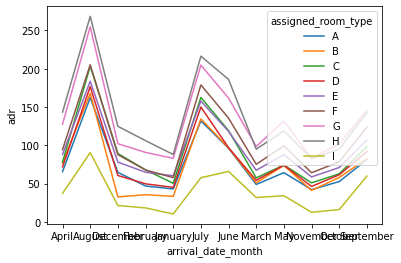

In [116]:
plt1 = sns.lineplot(x="arrival_date_month", y="adr", hue="assigned_room_type", data=dfvaryyearresort)

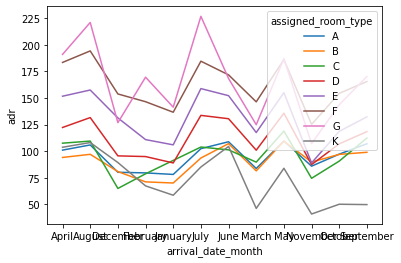

In [117]:
plt2 = sns.lineplot(x="arrival_date_month", y="adr", hue="assigned_room_type", data=dfvaryyearcity)

In [118]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

In [119]:
import sort_dataframeby_monthorweek as sd

In [120]:
dfvaryyearacchotel = df.groupby(["arrival_date_month", "hotel"])["adr"].mean().reset_index()

In [121]:
dfvaryyearacchotel = sd.Sort_Dataframeby_Month(dfvaryyearacchotel, "arrival_date_month")

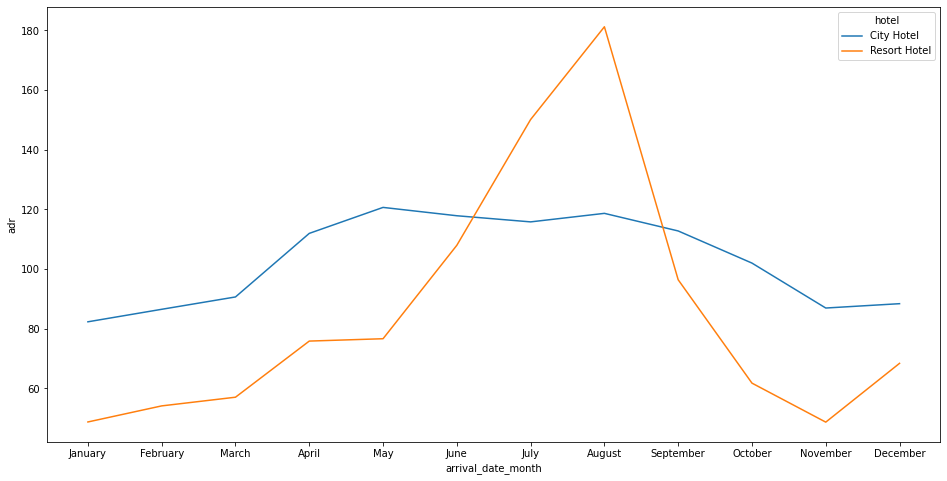

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt3 = sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=dfvaryyearacchotel)

Analyzing guest preference

In [123]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

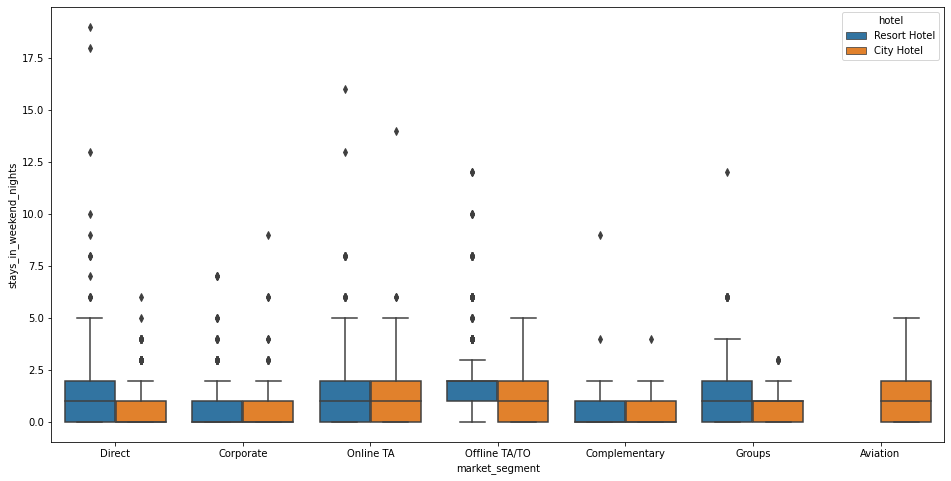

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.boxplot(x="market_segment", y="stays_in_weekend_nights", data=df, hue="hotel")

Analyzing guest behaviour

In [125]:
df4 = df["hotel"].value_counts().reset_index()
df4

,index,hotel
0,City Hotel,46084
1,Resort Hotel,28927


Text(0, 0.5, 'No. of entries')

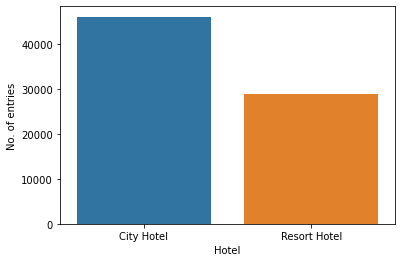

In [126]:
sns.barplot(x="index", y="hotel", data=df4)
plt.xlabel("Hotel")
plt.ylabel("No. of entries")

In [127]:
dfnew = pd.read_csv("hotel_bookings.csv")
dfnew1 = dfnew["is_canceled"].value_counts().reset_index()
dfnew1

,index,is_canceled
0,0,75166
1,1,44224


In [128]:
dfnew1["index"][0] = "Not canceled"
dfnew1["index"][1] = "Canceled"
dfnew1.columns = ["Canceled or not", "Number of entries"]
dfnew1

<ipython-input-128-693f5205bcd5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Canceled or not,Number of entries
0,Not canceled,75166
1,Canceled,44224


<AxesSubplot:xlabel='Canceled or not'>

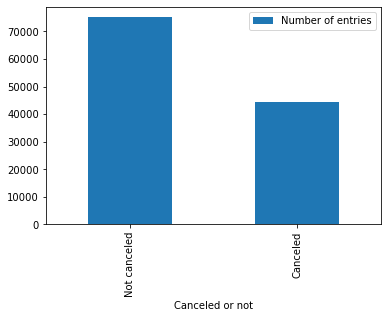

In [129]:
dfnew1.plot.bar(x="Canceled or not", y="Number of entries")

In [130]:
df = pd.read_csv("hotel_bookings.csv")
dfmeal = df["meal"].value_counts().reset_index()
px.pie(data_frame=dfmeal, names=df["meal"].value_counts().index, values=df["meal"].value_counts().values)

Analyzing relationship between special requests and cancelation

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

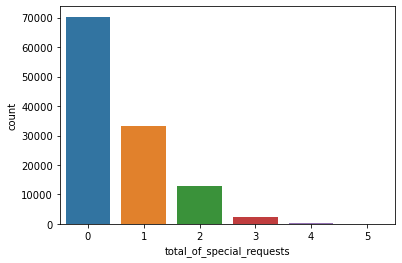

In [131]:
#analyzing special requests by customers
sns.countplot(x="total_of_special_requests", data=df)

In [138]:
dfcancreq = df.groupby(["total_of_special_requests", "is_canceled"])["hotel"].count().reset_index()
dfcancreq

,total_of_special_requests,is_canceled,hotel
0,0,0,36762
1,0,1,33556
2,1,0,25908
3,1,1,7318
4,2,0,10103
5,2,1,2866
6,3,0,2051
7,3,1,446
8,4,0,304
9,4,1,36


Text(0, 0.5, 'count')

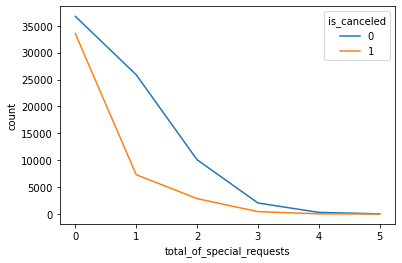

In [141]:
plt = sns.lineplot(x="total_of_special_requests", y="hotel", hue="is_canceled", data=dfcancreq)
plt.set_ylabel("count")

Text(0, 0.5, 'No. of bookings ')

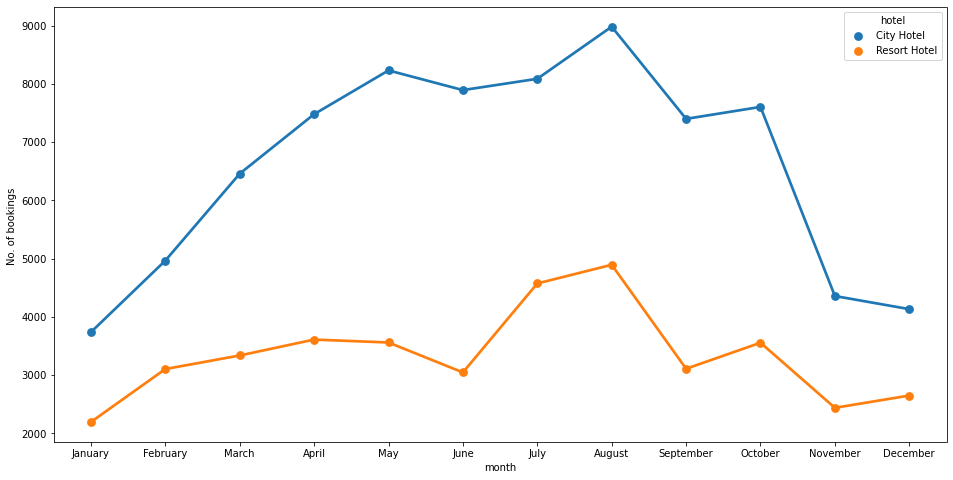

In [154]:
import sort_dataframeby_monthorweek as sd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
dfbusymon = df.groupby(["arrival_date_month", "hotel"])["is_canceled"].count().reset_index()
dfbusymonsort = sd.Sort_Dataframeby_Month(dfbusymon, "arrival_date_month")
plt = sns.pointplot(x="arrival_date_month", y="is_canceled", hue="hotel", data=dfbusymonsort)
plt.set_xlabel("month")
plt.set_ylabel("No. of bookings ")

Text(0, 0.5, 'No. of cancelations')

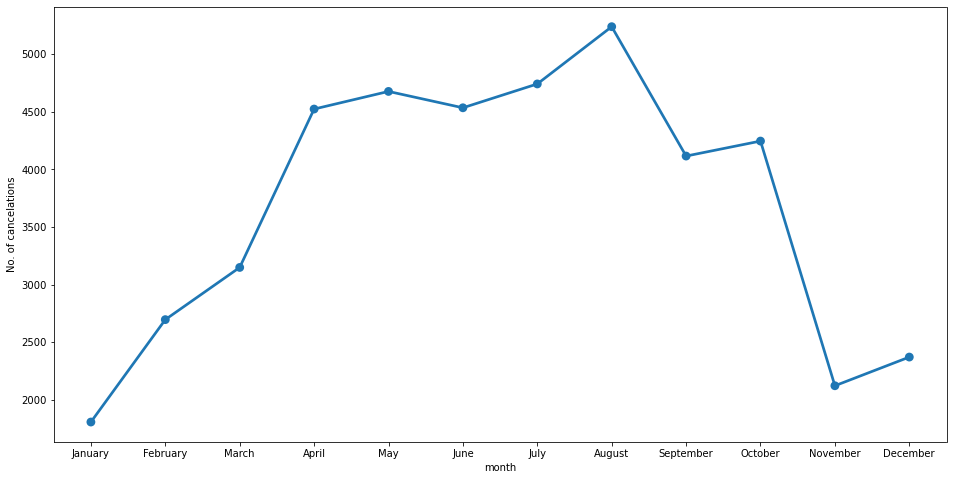

In [160]:
import sort_dataframeby_monthorweek as sd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
dfcancel = df[df["is_canceled"]==1]
dfhighcancmon = dfcancel.groupby(["arrival_date_month", "is_canceled"])["hotel"].count().reset_index()
dfhighcancmonsort = sd.Sort_Dataframeby_Month(dfhighcancmon, "arrival_date_month")
plt = sns.pointplot(x="arrival_date_month", y="hotel", data=dfhighcancmonsort)
plt.set_xlabel("month")
plt.set_ylabel("No. of cancelations")

In [161]:
dfcancel["arrival_date_month"].value_counts()

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64